# Simulacion

In [8]:
!pip install simpy

In [9]:
import heapq
import random
import matplotlib.pyplot as plt
import networkx as nx
import simpy

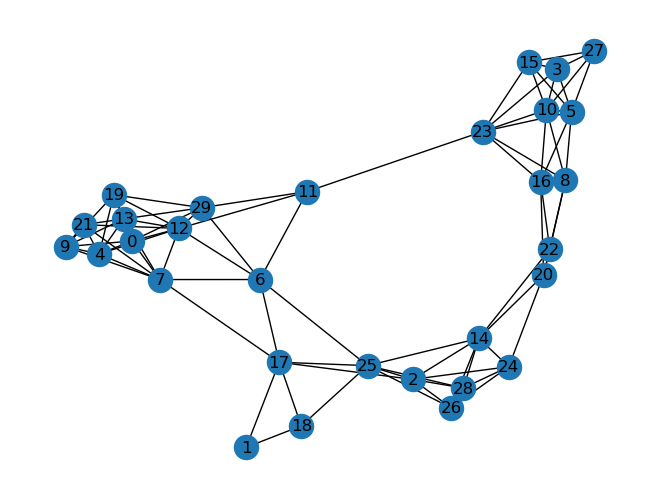

In [12]:
# Crear la red de sensores (grafo)
import networkx as nx

G = nx.random_geometric_graph(30, radius=0.3)
nx.draw(G, with_labels=True)

In [18]:
import simpy

class NodoSensor:
    def __init__(self, env, id, energia_inicial=100):
        self.env = env
        self.id = id
        self.energia = energia_inicial
        self.action = env.process(self.transmitir())

    def transmitir(self):
        while self.energia > 0:
            yield self.env.timeout(random.randint(5, 15))  # Espera aleatoria
            energia_consumida = random.uniform(1.0, 5.0)
            self.energia -= energia_consumida
            print(f"[{self.env.now}] Nodo {self.id} transmitió. Energía restante: {self.energia:.2f}")


In [20]:
env = simpy.Environment()
nodos = [NodoSensor(env, i) for i in range(10)]
env.run(until=100)

[5] Nodo 1 transmitió. Energía restante: 95.30
[8] Nodo 0 transmitió. Energía restante: 97.76
[8] Nodo 8 transmitió. Energía restante: 95.24
[9] Nodo 2 transmitió. Energía restante: 95.67
[9] Nodo 7 transmitió. Energía restante: 98.95
[10] Nodo 5 transmitió. Energía restante: 98.32
[10] Nodo 9 transmitió. Energía restante: 96.09
[11] Nodo 3 transmitió. Energía restante: 98.75
[14] Nodo 4 transmitió. Energía restante: 97.93
[15] Nodo 6 transmitió. Energía restante: 97.09
[16] Nodo 7 transmitió. Energía restante: 94.70
[17] Nodo 0 transmitió. Energía restante: 93.64
[17] Nodo 5 transmitió. Energía restante: 94.95
[18] Nodo 8 transmitió. Energía restante: 92.03
[19] Nodo 1 transmitió. Energía restante: 93.10
[21] Nodo 2 transmitió. Energía restante: 91.97
[24] Nodo 9 transmitió. Energía restante: 91.32
[25] Nodo 7 transmitió. Energía restante: 93.07
[25] Nodo 0 transmitió. Energía restante: 90.20
[26] Nodo 3 transmitió. Energía restante: 95.54
[27] Nodo 8 transmitió. Energía restante: 90.

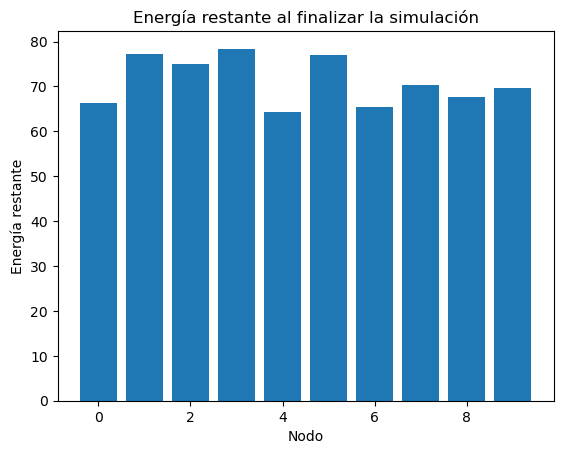

In [22]:
# Gráfico de energía final de los nodos
energias = [nodo.energia for nodo in nodos]
plt.bar(range(len(energias)), energias)
plt.xlabel("Nodo")
plt.ylabel("Energía restante")
plt.title("Energía restante al finalizar la simulación")
plt.show()